# Flight Booking Price Prediction

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Data

In [2]:
Data=pd.read_csv('Flight_Booking.csv') ## Loading the data
Data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
Data=Data.drop(columns=["Unnamed: 0"]) ## Removing unnecessary column

In [4]:
Data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
Data.shape

(300153, 11)

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
Data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
Data.isnull().sum() ## checking missing values

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## Data Visualization

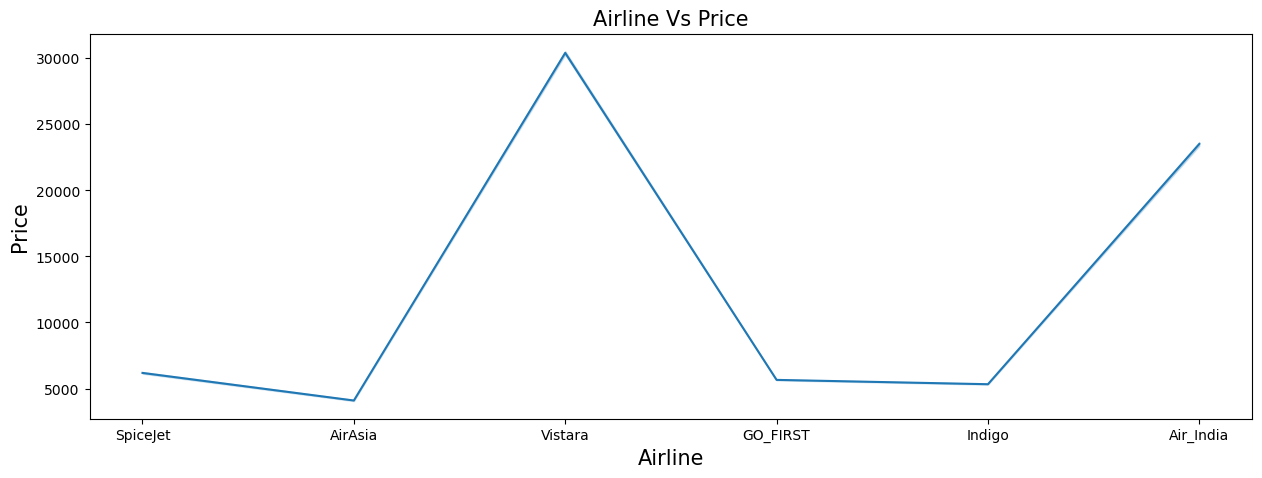

In [9]:
plt.figure(figsize=(15,5))
sns.lineplot(x=Data['airline'],y=Data['price'])
plt.title("Airline Vs Price",fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

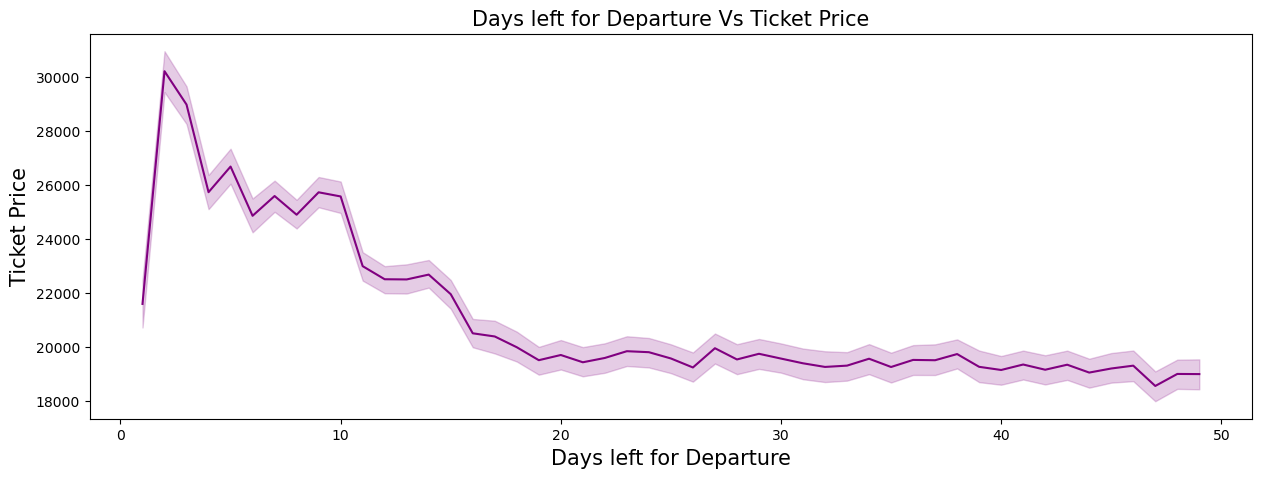

In [10]:
plt.figure(figsize=(15,5))
sns.lineplot(x=Data['days_left'],y=Data['price'],color='purple')
plt.title("Days left for Departure Vs Ticket Price",fontsize=15)
plt.xlabel('Days left for Departure',fontsize=15)
plt.ylabel('Ticket Price',fontsize=15)
plt.show()

<Axes: xlabel='airline', ylabel='price'>

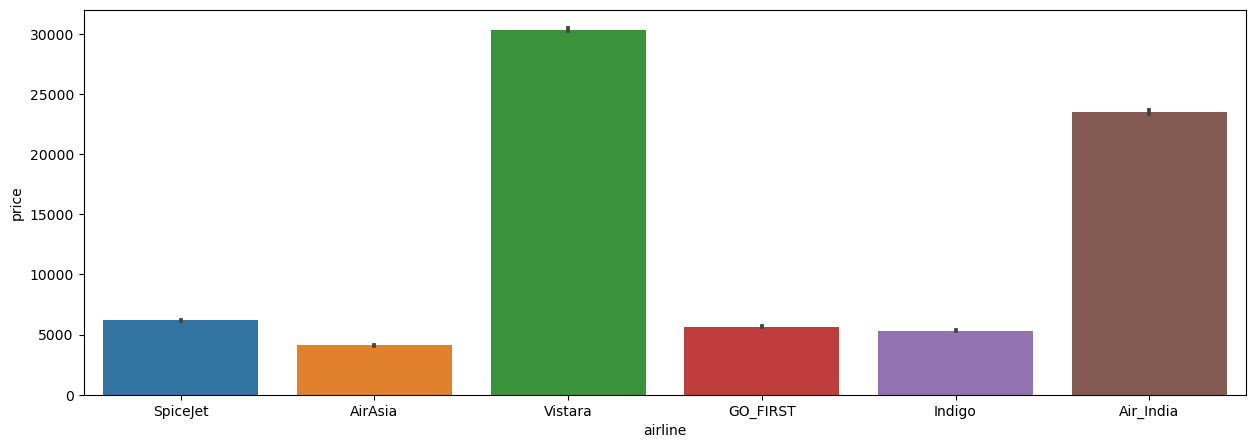

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(x=Data['airline'],y=Data['price'],data=Data)

<Axes: xlabel='class', ylabel='price'>

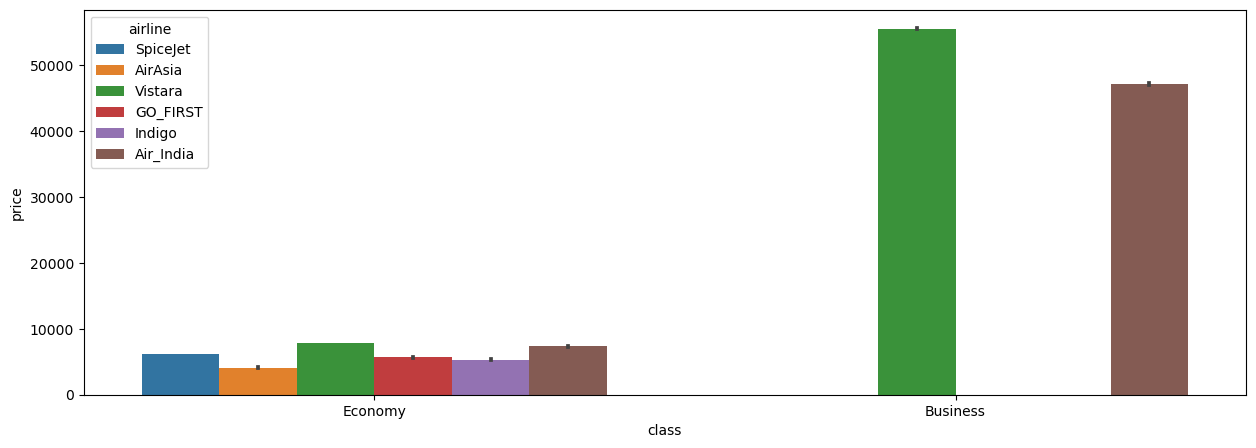

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(x=Data['class'],y=Data['price'],data=Data,hue='airline')

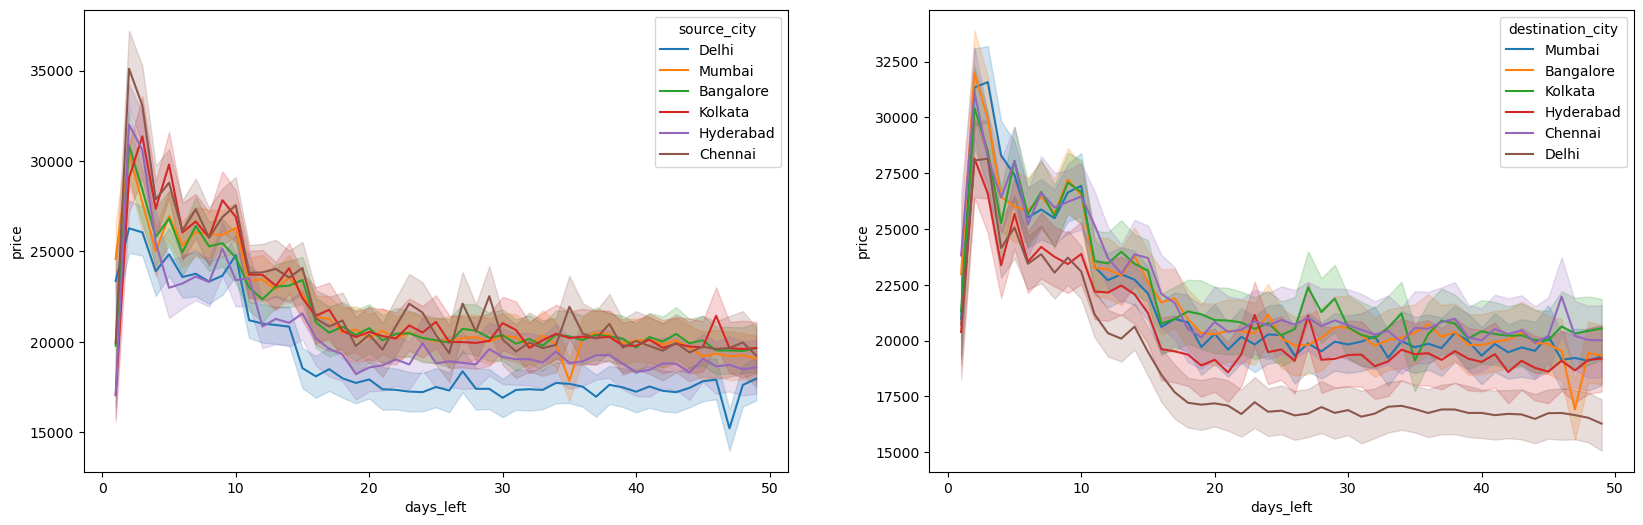

In [13]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left',y='price',data=Data,hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price',data=Data,hue='destination_city',ax=ax[1])
plt.show()

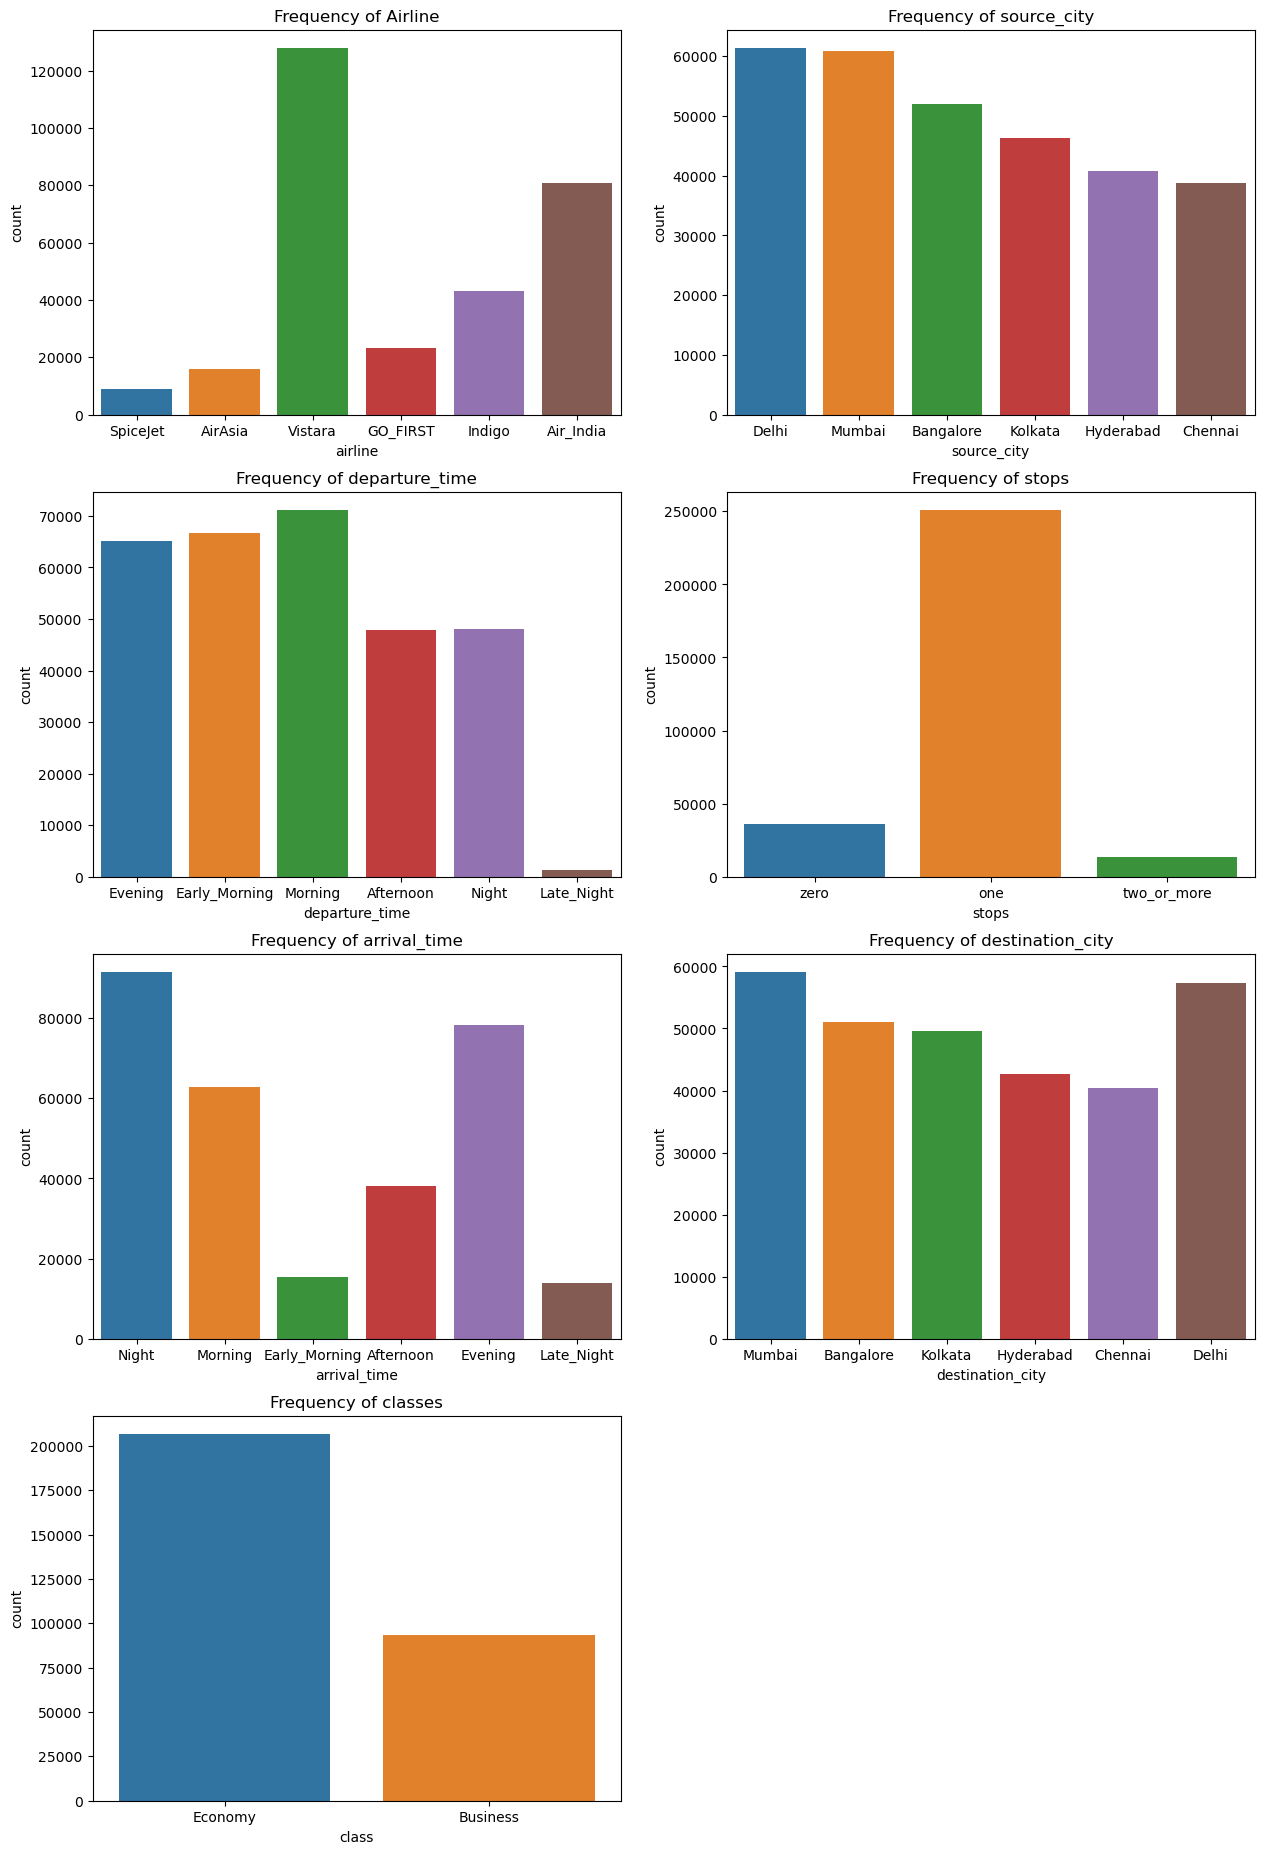

In [14]:
plt.figure(figsize=(15,23))
plt.subplot(4,2,1)
sns.countplot(x='airline',data=Data)
plt.title("Frequency of Airline")

plt.subplot(4,2,2)
sns.countplot(x='source_city',data=Data)
plt.title("Frequency of source_city")

plt.subplot(4,2,3)
sns.countplot(x='departure_time',data=Data)
plt.title("Frequency of departure_time")

plt.subplot(4,2,4)
sns.countplot(x='stops',data=Data)
plt.title("Frequency of stops")

plt.subplot(4,2,5)
sns.countplot(x='arrival_time',data=Data)
plt.title("Frequency of arrival_time")

plt.subplot(4,2,6)
sns.countplot(x='destination_city',data=Data)
plt.title("Frequency of destination_city")

plt.subplot(4,2,7)
sns.countplot(x='class',data=Data)
plt.title("Frequency of classes")

plt.show()


# Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Data['airline']=le.fit_transform(Data['airline'])
Data['source_city']=le.fit_transform(Data['source_city'])
Data['departure_time']=le.fit_transform(Data['departure_time'])
Data['stops']=le.fit_transform(Data['stops'])
Data['arrival_time']=le.fit_transform(Data['arrival_time'])
Data['destination_city']=le.fit_transform(Data['destination_city'])
Data['class']=le.fit_transform(Data['class'])
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


## Feature Selection

C:\Users\Dell\AppData\Local\Temp\ipykernel_7288\890769614.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Data.corr(),annot=True,cmap="coolwarm")


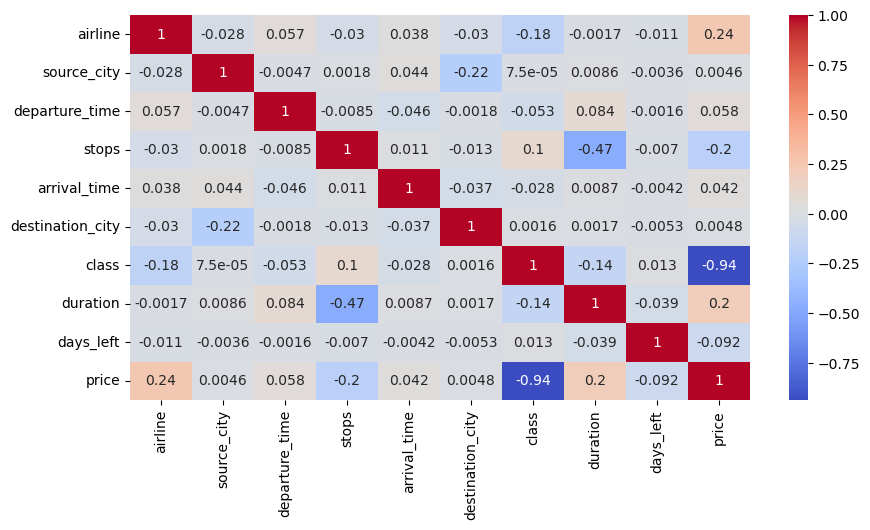

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(Data.corr(),annot=True,cmap="coolwarm")
plt.show()

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in Data.columns:
    if((Data[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)
x=Data[col_list]
vif_data=pd.DataFrame()
vif_data['Feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i)
                for i in range(len(x.columns))]
print(vif_data)

            Feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [18]:
Data=Data.drop(columns=["stops"])
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in Data.columns:
    if ((Data[col].dtype!='object')&(col!='price')):
        col_list.append(col)
X=Data[col_list]
vif_data=pd.DataFrame()
vif_data['Feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i)
                for i in range(len(X.columns))]
print(vif_data)


            Feature       VIF
0           airline  3.370020
1       source_city  2.895803
2    departure_time  2.746255
3      arrival_time  3.632792
4  destination_city  2.857808
5             class  2.776721
6          duration  3.429344
7         days_left  3.950132


In [36]:
# Apply StandardScaler to scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
x_train_scaled = scaler.fit_transform(x_train_encoded)
x_test_scaled = scaler.transform(x_test_encoded)

# Train the Linear Regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

# Make predictions
y_pred = lr.predict(x_test_scaled)

# Create a DataFrame to compare actual and predicted values
difference = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
print(difference)




        Actual Value  Predicted Value
27131           7366      4729.660554
266857         64831     55382.961567
141228          6195     11326.293817
288329         60160     52750.780839
97334           6578      9957.268703
...              ...              ...
5234            5026      3877.850598
5591            3001      3774.700710
168314          6734      5361.931129
175191          5082      3477.012507
287693         66465     57464.247795

[60031 rows x 2 columns]


In [37]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
from sklearn import metrics
mean_abs_error= metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error


6629.928629303853

C:\Users\Dell\AppData\Local\Temp\ipykernel_7288\1514020514.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label="Actual")
C:\Users\Dell\AppData\Local\Temp\ipykernel_7288\1514020514.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label="Predicted")


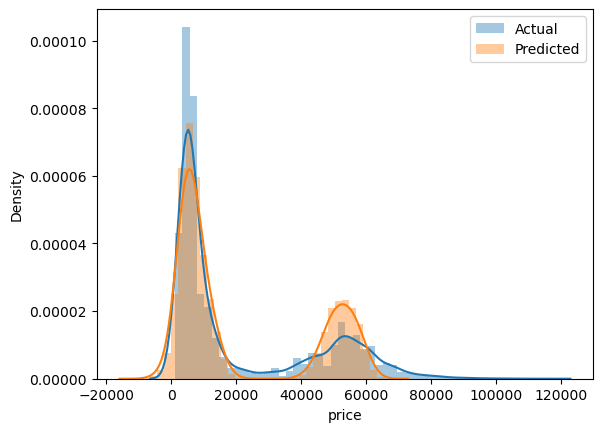

In [38]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred,label="Predicted")
plt.legend()

In [43]:
# Create a ColumnTransformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder="passthrough"
)

# Fit and transform the training data
x_train_encoded = preprocessor.fit_transform(x_train)

# Transform the test data
x_test_encoded = preprocessor.transform(x_test)


In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Train the DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train_encoded, y_train)

# Make predictions on the test data
y_pred = dt.predict(x_test_encoded)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)


R^2 Score: 0.9817078024059506


In [49]:
# You can print the data types of all columns
print(Data.dtypes)

# Identify categorical columns (object data type)
categorical_cols = Data.select_dtypes(include=['object']).columns.tolist()

# Identify numerical columns (excluding object data type)
numerical_cols = Data.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

airline               int32
flight               object
source_city           int32
departure_time        int32
arrival_time          int32
destination_city      int32
class                 int32
duration            float64
days_left             int64
price                 int64
dtype: object
Categorical Columns: ['flight']
Numerical Columns: ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']


In [51]:
print(Data.columns)

Index(['airline', 'flight', 'source_city', 'departure_time', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')


In [ ]:
categorical_cols = ['airline', 'flight', 'source_city', 'destination_city', 'class']
numerical_cols = ['departure_time', 'arrival_time', 'duration', 'days_left']


# You can print the data types of all columns
print(Data.dtypes)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Data.drop('price', axis=1), Data['price'], test_size=0.2, random_state=42)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor()

# Create and fit the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
pipeline.fit(x_train, y_train)

# Predict on the testing data
y_pred = pipeline.predict(x_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)
# Visualize the distribution of actual and predicted values
sns.distplot(y_test, label='Actual')
sns.distplot(y_pred, label='Predicted')
plt.legend()
plt.show()

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
